In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import fatf.fairness.data.measures as fatf_dfm
import fatf.utils.data.tools as fatf_data_tools
from itertools import combinations
import warnings
warnings.filterwarnings("ignore", category=Warning)

25-Oct-23 22:29:31 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [2]:
d1= pd.read_csv('../data/final_data_mapping.csv')
d1

,subject_id,hadm_id,admission_type,insurance,language,marital_status,race,hospital_expire_flag,Sodium_full_missing,Sodium_full_min,...,GCS_Motor_last_25_max,GCS_Motor_last_25_mode,GCS_Motor_last_25_count,GCS_Motor_last_10_missing,GCS_Motor_last_10_min,GCS_Motor_last_10_max,GCS_Motor_last_10_mode,GCS_Motor_last_10_count,gender,anchor_age
0,10000690,25860671,1,1,1,3,1,0,0.0,133.0,...,6.0,6.0,3.0,0.0,6.0,6.0,6.0,1.0,2,2
1,10001217,24597018,1,3,5,1,1,0,0.0,138.0,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,0.0,2,2
2,10001725,25563031,1,3,1,1,1,0,0.0,138.0,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,0.0,2,1
3,10002013,23581541,3,1,1,2,5,0,0.0,136.0,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,0.0,2,2
4,10002114,27793700,4,2,1,0,5,0,0.0,125.0,...,6.0,6.0,1.0,0.0,6.0,6.0,6.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44416,19999287,20175828,1,1,1,2,2,0,0.0,139.0,...,6.0,6.0,3.0,0.0,6.0,6.0,6.0,2.0,2,2
44417,19999442,26785317,5,2,1,3,1,0,0.0,139.0,...,6.0,6.0,7.0,0.0,6.0,6.0,6.0,3.0,1,1
44418,19999828,25744818,1,2,1,2,1,0,0.0,133.0,...,6.0,6.0,1.0,1.0,NaN,NaN,NaN,0.0,2,1
44419,19999840,21033226,1,3,1,3,1,1,0.0,137.0,...,4.0,4.0,3.0,0.0,4.0,4.0,4.0,1.0,1,2


In [3]:
systemic_bias_data= pd.read_csv('../data/full_imputed.csv')
systemic_bias_data.head()

,GCS_Eye_full_missing,GCS_Eye_full_min,GCS_Eye_full_max,GCS_Eye_full_mode,GCS_Eye_full_count,GCS_Eye_first_10_missing,GCS_Eye_first_10_min,GCS_Eye_first_10_max,GCS_Eye_first_10_mode,GCS_Eye_first_10_count,...,NIBP_Systolic_last_10_skew,NIBP_Systolic_last_10_count,admission_type,insurance,language,marital_status,race,gender,anchor_age,hospital_expire_flag
0,0.0,3.0,4.0,4.0,12.0,0.0,4.0,4.0,4.0,1.0,...,1.272983,5.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,0
1,0.0,4.0,4.0,4.0,20.0,0.0,4.0,4.0,4.0,5.0,...,0.011062,0.0,1.0,3.0,5.0,1.0,1.0,2.0,2.0,0
2,0.0,4.0,4.0,4.0,5.0,0.0,4.0,4.0,4.0,2.0,...,0.011062,0.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,0
3,0.0,1.0,4.0,4.0,5.0,0.0,1.0,1.0,1.0,1.0,...,0.011062,0.0,3.0,1.0,1.0,2.0,5.0,2.0,2.0,0
4,0.0,2.0,4.0,2.0,6.0,0.0,2.0,2.0,2.0,1.0,...,0.829867,5.0,4.0,2.0,1.0,0.0,5.0,1.0,2.0,0


In [4]:
keywords = ['full_mean', 'full_mode']

selected_columns = [col for col in systemic_bias_data.columns if any(keyword in col for keyword in keywords)]

selected_columns += ['insurance', 'race','gender','hospital_expire_flag']

evalauate_sys_bias= systemic_bias_data[selected_columns]
evalauate_sys_bias.head()

,GCS_Eye_full_mode,GCS_Verbal_full_mode,GCS_Motor_full_mode,Sodium_full_mean,Creatinine_full_mean,BUN_full_mean,HeartRate_full_mean,RespiratoryRate_full_mean,Hematocrit_full_mean,FiO2_full_mean,pH_Arterial_full_mean,PaO2_full_mean,TempF_full_mean,NIBP_Systolic_full_mean,insurance,race,gender,hospital_expire_flag
0,4.0,4.0,6.0,134.666667,0.866667,21.666667,77.591837,21.448980,29.600000,67.083333,7.375902,167.3955,97.525000,118.604167,1.0,1.0,2.0,0
1,4.0,5.0,6.0,138.000000,0.400000,9.000000,93.296296,21.259259,33.600000,53.864613,7.375902,167.3955,99.066667,136.296296,3.0,1.0,2.0,0
2,4.0,5.0,6.0,139.000000,0.800000,17.000000,79.156250,17.531250,37.700000,53.864613,7.375902,167.3955,97.900000,100.406250,3.0,1.0,2.0,0
3,4.0,5.0,6.0,138.333333,1.000000,14.500000,94.214286,15.185185,30.675000,66.666667,7.338889,282.8750,98.967778,110.500000,1.0,5.0,2.0,0
4,2.0,1.0,4.0,129.833333,1.933333,38.666667,82.860759,15.948276,30.542857,30.000000,7.570000,140.5000,98.278095,110.212766,2.0,5.0,1.0,0


In [5]:
features = [
    'HeartRate_full_mean','RespiratoryRate_full_mean', 'Sodium_full_mean', 'Creatinine_full_mean', 'BUN_full_mean',
    'Hematocrit_full_mean', 'TempF_full_mean', 'NIBP_Systolic_full_mean', 'FiO2_full_mean',
    'pH_Arterial_full_mean', 'PaO2_full_mean']

for feature in features:
    if feature in evalauate_sys_bias.columns:
        min_val = evalauate_sys_bias[feature].min()
        max_val = evalauate_sys_bias[feature].max()
        print(f"{feature}: min={min_val}, max={max_val}")
    else:
        print(f"{feature} not found in dataframe")


HeartRate_full_mean: min=40.0, max=162.59183673469389
RespiratoryRate_full_mean: min=5.0, max=43.16129032258065
Sodium_full_mean: min=120.0, max=160.0
Creatinine_full_mean: min=0.1999999999999999, max=10.0
BUN_full_mean: min=4.0, max=130.0
Hematocrit_full_mean: min=15.0, max=55.0
TempF_full_mean: min=95.0, max=103.7
NIBP_Systolic_full_mean: min=70.0, max=200.0
FiO2_full_mean: min=10.0, max=100.0
pH_Arterial_full_mean: min=6.82, max=7.6
PaO2_full_mean: min=30.0, max=500.0


In [6]:
bins_labels = {
    'HeartRate_full_mean': {
        'bins': [40, 60, 100, 163],
        'labels': [1, 2, 3]
    },
    'RespiratoryRate_full_mean': {
        'bins': [5, 12, 20, 44],
        'labels': [1, 2, 3]
    },
    'Sodium_full_mean': {
        'bins': [120, 130, 135, 145, 161],
        'labels': [1, 2, 3, 4]
    },
    'Creatinine_full_mean': {
        'bins': [0.19, 0.6, 1.2, 10],
        'labels': [1, 2, 3]
    },
    'BUN_full_mean': {
        'bins': [4, 7, 20, 130],
        'labels': [1, 2, 3]
    },
    'Hematocrit_full_mean': {
        'bins': [15, 30, 40, 50, 56],
        'labels': [1, 2, 3, 4]
    },
    'TempF_full_mean': {
        'bins': [95, 97, 99, 104],
        'labels': [1, 2, 3]
    },
    'NIBP_Systolic_full_mean': {
        'bins': [70, 90, 120, 140, 201],
        'labels': [1, 2, 3, 4]
    },
    'FiO2_full_mean': {
        'bins': [10, 21, 50, 100],
        'labels': [1, 2, 3]
    },
    'pH_Arterial_full_mean': {
        'bins': [6.8, 7.35, 7.45, 7.7],
        'labels': [1, 2, 3]
    },
    'PaO2_full_mean': {
        'bins': [30, 60, 75, 100, 501],
        'labels': [1, 2, 3, 4]
    }
}

In [7]:
df_binned = evalauate_sys_bias.copy()

for feature, bin_info in bins_labels.items():
    if feature in df_binned.columns:
        df_binned[f'{feature}_cat'] = pd.cut(
            df_binned[feature],
            bins=bin_info['bins'],
            labels=bin_info['labels'],
            right=False
        )
    else:
        print(f"Warning: {feature} not found in dataframe")

original_features = list(bins_labels.keys())
columns_to_keep = [col for col in df_binned.columns if col not in original_features]

df_final_binned = df_binned[columns_to_keep]

# Reattach subject_id from d1 to systemic_bias_data
df_final_binned['subject_id'] = d1['subject_id']

df_final_binned.head() 

,GCS_Eye_full_mode,GCS_Verbal_full_mode,GCS_Motor_full_mode,insurance,race,gender,hospital_expire_flag,HeartRate_full_mean_cat,RespiratoryRate_full_mean_cat,Sodium_full_mean_cat,Creatinine_full_mean_cat,BUN_full_mean_cat,Hematocrit_full_mean_cat,TempF_full_mean_cat,NIBP_Systolic_full_mean_cat,FiO2_full_mean_cat,pH_Arterial_full_mean_cat,PaO2_full_mean_cat,subject_id
0,4.0,4.0,6.0,1.0,1.0,2.0,0,2,3,2,2,3,1,2,2,3,2,4,10000690
1,4.0,5.0,6.0,3.0,1.0,2.0,0,2,3,3,1,2,2,3,3,3,2,4,10001217
2,4.0,5.0,6.0,3.0,1.0,2.0,0,2,2,3,2,2,2,2,2,3,2,4,10001725
3,4.0,5.0,6.0,1.0,5.0,2.0,0,2,2,3,2,2,2,2,2,3,1,4,10002013
4,2.0,1.0,4.0,2.0,5.0,1.0,0,2,2,1,3,3,2,2,2,2,3,4,10002114


In [8]:
filtered_df = df_final_binned[(df_final_binned['race'] != 5) & (df_final_binned['insurance'] != 4)]
filtered_df

,GCS_Eye_full_mode,GCS_Verbal_full_mode,GCS_Motor_full_mode,insurance,race,gender,hospital_expire_flag,HeartRate_full_mean_cat,RespiratoryRate_full_mean_cat,Sodium_full_mean_cat,Creatinine_full_mean_cat,BUN_full_mean_cat,Hematocrit_full_mean_cat,TempF_full_mean_cat,NIBP_Systolic_full_mean_cat,FiO2_full_mean_cat,pH_Arterial_full_mean_cat,PaO2_full_mean_cat,subject_id
0,4.0,4.0,6.0,1.0,1.0,2.0,0,2,3,2,2,3,1,2,2,3,2,4,10000690
1,4.0,5.0,6.0,3.0,1.0,2.0,0,2,3,3,1,2,2,3,3,3,2,4,10001217
2,4.0,5.0,6.0,3.0,1.0,2.0,0,2,2,3,2,2,2,2,2,3,2,4,10001725
5,3.0,5.0,6.0,1.0,1.0,2.0,0,2,3,2,1,2,1,2,2,2,2,4,10002428
6,4.0,5.0,6.0,1.0,1.0,1.0,0,2,3,3,3,3,2,2,2,3,2,4,10002430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44415,1.0,1.0,5.0,1.0,1.0,1.0,0,2,2,3,2,1,2,2,2,3,2,4,19999068
44416,4.0,5.0,6.0,1.0,2.0,2.0,0,2,3,3,2,2,2,2,2,3,2,4,19999287
44417,3.0,2.0,5.0,2.0,1.0,1.0,0,2,2,3,2,2,2,2,4,2,2,4,19999442
44418,3.0,5.0,6.0,2.0,1.0,2.0,0,2,2,3,2,2,2,2,2,3,2,4,19999828


    ====> check if there is systemic bias the same features but different senstive and target 

In [ ]:
# find biased rows, rows which hv the same unprotetecd features, but hv different protected feature and target

In [9]:
def find_systemic_bias_pairs_unique(df, protected_features, target_col, unprotected_features):
    bias_pairs = []
    unique_rows = set()

    grouped = df.groupby(unprotected_features)

    for group_vals, group_df in grouped:
        if len(group_df) < 2:
            continue
        
        for i, j in combinations(group_df.index, 2):
            row_i = group_df.loc[i]
            row_j = group_df.loc[j]

            protected_diff = any(row_i[feat] != row_j[feat] for feat in protected_features)
            target_diff = row_i[target_col] != row_j[target_col]

            if protected_diff and target_diff:
                bias_pairs.append({
                    "Row1_Index": i,
                    "Row1_SubjectID": row_i["subject_id"],
                    "Row1_Insurance": row_i[protected_features[0]],
                    "Row1_Target": row_i[target_col],

                    "Row2_Index": j,
                    "Row2_SubjectID": row_j["subject_id"],
                    "Row2_Insurance": row_j[protected_features[0]],
                    "Row2_Target": row_j[target_col]
                })
                unique_rows.add(i)
                unique_rows.add(j)

    systemic_bias_df = df.loc[list(unique_rows)] if unique_rows else pd.DataFrame()

    return pd.DataFrame(bias_pairs), systemic_bias_df

In [10]:
protected = ['insurance']
target = 'hospital_expire_flag'
subject= 'subject_id'
unprotected = [col for col in filtered_df.columns if col not in protected + [target] + [subject]]

bias_pairs_df, unique_unfair_rows_df = find_systemic_bias_pairs_unique(filtered_df, protected, target, unprotected)

print(f"Found {len(bias_pairs_df)} biased pairs and {len(unique_unfair_rows_df)} unique unfair rows.")

if not bias_pairs_df.empty:
    print("\n Unfair Pairs:")
    display(bias_pairs_df.head(5)) 
else:
    print("No systemic bias detected.")

Found 8921 biased pairs and 5380 unique unfair rows.

 Unfair Pairs:


,Row1_Index,Row1_SubjectID,Row1_Insurance,Row1_Target,Row2_Index,Row2_SubjectID,Row2_Insurance,Row2_Target
0,21165,14743754.0,3.0,0.0,28376,16393593.0,1.0,1.0
1,21485,14818921.0,3.0,0.0,28376,16393593.0,1.0,1.0
2,28376,16393593.0,1.0,1.0,40905,19212090.0,3.0,0.0
3,6015,11328582.0,2.0,0.0,19032,14265588.0,1.0,1.0
4,11167,12500891.0,3.0,0.0,19032,14265588.0,1.0,1.0


In [11]:
Row1_Index = 6015
Row2_Index = 19032 
filtered_df.loc[[Row1_Index, Row2_Index]]

,GCS_Eye_full_mode,GCS_Verbal_full_mode,GCS_Motor_full_mode,insurance,race,gender,hospital_expire_flag,HeartRate_full_mean_cat,RespiratoryRate_full_mean_cat,Sodium_full_mean_cat,Creatinine_full_mean_cat,BUN_full_mean_cat,Hematocrit_full_mean_cat,TempF_full_mean_cat,NIBP_Systolic_full_mean_cat,FiO2_full_mean_cat,pH_Arterial_full_mean_cat,PaO2_full_mean_cat,subject_id
6015,1.0,1.0,1.0,2.0,1.0,1.0,0,2,2,3,2,2,1,2,2,3,2,4,11328582
19032,1.0,1.0,1.0,1.0,1.0,1.0,1,2,2,3,2,2,1,2,2,3,2,4,14265588


In [12]:
insurance_map = {1: 'Medicare', 2: 'Medicaid', 3: 'Private'}

bias_pairs_df["Row1_Insurance"] = bias_pairs_df["Row1_Insurance"].map(insurance_map)
bias_pairs_df["Row2_Insurance"] = bias_pairs_df["Row2_Insurance"].map(insurance_map)

bias_counts = bias_pairs_df.groupby(["Row1_Insurance", "Row2_Insurance"]).size().reset_index(name="count")

zero_to_one_pairs = bias_pairs_df[(bias_pairs_df['Row1_Target'] == 0) & (bias_pairs_df['Row2_Target'] == 1)]

zero_to_one_counts = zero_to_one_pairs.groupby(['Row1_Insurance', 'Row2_Insurance']).size().reset_index(name='count')

print("Counts of insurance pairs causing change from 0 to 1:")
print(zero_to_one_counts)

one_to_zero_pairs = bias_pairs_df[(bias_pairs_df['Row1_Target'] == 1) & (bias_pairs_df['Row2_Target'] == 0)]

one_to_zero_counts = one_to_zero_pairs.groupby(['Row1_Insurance', 'Row2_Insurance']).size().reset_index(name='count')

print("\nCounts of insurance pairs causing change from 1 to 0:")
print(one_to_zero_counts)


Counts of insurance pairs causing change from 0 to 1:
  Row1_Insurance Row2_Insurance  count
0       Medicaid       Medicare    429
1       Medicaid        Private    207
2       Medicare       Medicaid    326
3       Medicare        Private   1382
4        Private       Medicaid     85
5        Private       Medicare   1486

Counts of insurance pairs causing change from 1 to 0:
  Row1_Insurance Row2_Insurance  count
0       Medicaid       Medicare    387
1       Medicaid        Private    127
2       Medicare       Medicaid    565
3       Medicare        Private   2013
4        Private       Medicaid    219
5        Private       Medicare   1695


In [57]:
heatmap_all = bias_counts.pivot(index="Row1_Insurance", columns="Row2_Insurance", values="count").fillna(0)
heatmap_0to1 = zero_to_one_counts.pivot(index="Row1_Insurance", columns="Row2_Insurance", values="count").fillna(0)
heatmap_1to0 = one_to_zero_counts.pivot(index="Row1_Insurance", columns="Row2_Insurance", values="count").fillna(0)

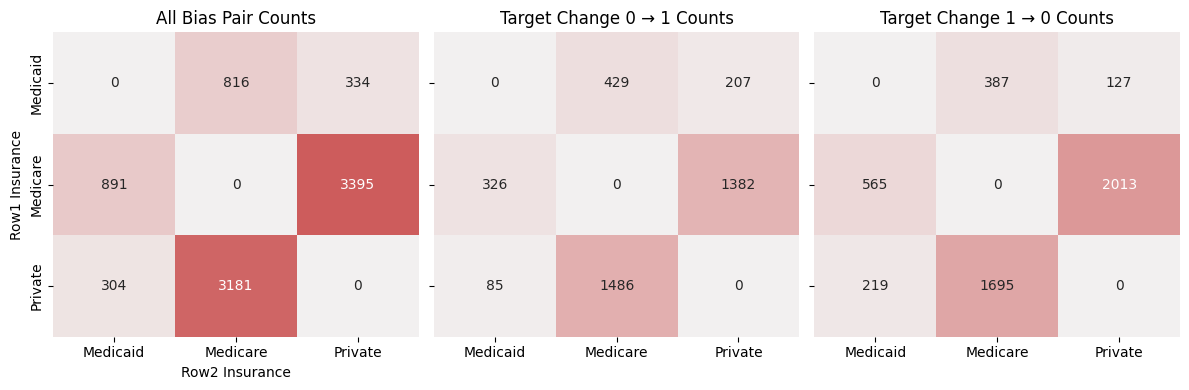

In [59]:
# Compute shared min and max for color scaling
vmin = min(heatmap_all.min().min(), heatmap_0to1.min().min(), heatmap_1to0.min().min())
vmax = max(heatmap_all.max().max(), heatmap_0to1.max().max(), heatmap_1to0.max().max())

soft_red = sns.light_palette("indianred", as_cmap=True)
fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=True)

# All Bias Pair Counts
sns.heatmap(
    heatmap_all, annot=True, fmt=".0f", cmap=soft_red, ax=axes[0],
    vmin=vmin, vmax=vmax, cbar=False
)
axes[0].set_title("All Bias Pair Counts")
axes[0].set_xlabel("Row2 Insurance")
axes[0].set_ylabel("Row1 Insurance")

# Target Change 0 → 1 Counts
sns.heatmap(
    heatmap_0to1, annot=True, fmt=".0f", cmap=soft_red, ax=axes[1],
    vmin=vmin, vmax=vmax, cbar=False
)
axes[1].set_title("Target Change 0 → 1 Counts")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Target Change 1 → 0 Counts
sns.heatmap(
    heatmap_1to0, annot=True, fmt=".0f", cmap=soft_red, ax=axes[2],
    vmin=vmin, vmax=vmax, cbar=False
)
axes[2].set_title("Target Change 1 → 0 Counts")
axes[2].set_xlabel("")
axes[2].set_ylabel("")

plt.tight_layout()
plt.savefig("labelling_insurance_final.pdf", bbox_inches='tight', dpi=300)
#plt.savefig("labelling_bias_ins.png", bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
# DTW check on the found biased pairs

In [21]:
from tslearn.metrics import dtw, dtw_path
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
from itertools import combinations

In [22]:
data = pd.read_csv('../data/subject_value_capped.csv')
admission = pd.read_csv('../mimic-iv-3.1/hosp/admissions.csv')

subject_admission = pd.merge(admission[['subject_id','hadm_id','insurance','language','race','hospital_expire_flag']],
             data, on=['subject_id','hadm_id'],how='inner')

patient = pd.read_csv('../mimic-iv-3.1/hosp/patients.csv')

final_subject = pd.merge(subject_admission,patient[['subject_id','gender']], on=['subject_id'],how='inner')
subjects = final_subject.drop(columns =['intime','outtime','duration','value','valuenum','valueuom','hadm_id','stay_id'])
subjects

,subject_id,insurance,language,race,hospital_expire_flag,charttime,itemid,valuenum_capped,gender
0,10000690,Medicare,English,WHITE,0,2150-11-04 12:00:00,223835,50.00,F
1,10000690,Medicare,English,WHITE,0,2150-11-04 18:00:00,223835,70.00,F
2,10000690,Medicare,English,WHITE,0,2150-11-02 19:54:00,220045,79.00,F
3,10000690,Medicare,English,WHITE,0,2150-11-02 19:54:00,220179,107.00,F
4,10000690,Medicare,English,WHITE,0,2150-11-02 19:54:00,220210,23.00,F
...,...,...,...,...,...,...,...,...,...
8532919,19999987,Medicaid,English,UNKNOWN,0,2145-11-04 05:01:00,220645,147.00,F
8532920,19999987,Medicaid,English,UNKNOWN,0,2145-11-04 05:01:00,225624,22.00,F
8532921,19999987,Medicaid,English,UNKNOWN,0,2145-11-04 07:18:00,220224,69.00,F
8532922,19999987,Medicaid,English,UNKNOWN,0,2145-11-04 07:18:00,223830,7.42,F


In [23]:
def map_column(df, column_name, mapping_dict, missing_value=None, additional_logic=None):
    
    df[column_name] = df[column_name].fillna(missing_value)
    
    if additional_logic:
        df[column_name] = df[column_name].apply(additional_logic)
    
    df[column_name] = df[column_name].map(mapping_dict)
    
    return df

insurance_map = {
    'Medicare': 1,
    'Medicaid': 2,
    'Private': 3,
    'Other': 4,
    'No charge': 4,
    '': 4}
race_map = {
    'White': 1,
    'Black': 2,
    'Asian': 3,
    'Hispanic': 4,
    'Other': 5,
    '' : 5}

language_map = {
    'English': 1, 
    'Spanish': 2,
    'East Asian': 3,
    'European': 4,
    'Other': 5,
    '' : 5}

gender_map = {
    'M': 1,
    'F': 2}

In [24]:
def map_race(race_str):
    if pd.isnull(race_str):
        return 'Other'
    race_str = race_str.upper()
    if race_str.startswith('WHITE') or race_str in ['PORTUGUESE']:
        return 'White'
    elif 'BLACK' in race_str or 'AFRICAN' in race_str:
        return 'Black'
    elif race_str.startswith('ASIAN'):
        return 'Asian'
    elif race_str.startswith('HISPANIC') or 'SOUTH AMERICAN' in race_str or 'CENTRAL AMERICAN' in race_str:
        return 'Hispanic'
    else:
        return 'Other'

def map_language(lang):
    if lang == 'English':
        return 'English'
    elif lang == 'Spanish':
        return 'Spanish'
    elif lang in ['Chinese', 'Korean', 'Japanese', 'Vietnamese']:
        return 'East Asian'
    elif lang in ['Portuguese', 'Russian', 'Italian', 'Modern Greek (1453-)', 'Polish', 'French']:
        return 'European'
    else:
        return 'Other'

In [25]:
data_dtw = subjects.copy()
data_dtw = map_column(data_dtw, 'language', language_map, missing_value='', additional_logic=map_language)

data_dtw = map_column(data_dtw, 'gender', gender_map, missing_value= '', additional_logic=None) 

data_dtw = map_column(data_dtw, 'race', race_map, missing_value='', additional_logic=map_race)

data_dtw = map_column(data_dtw, 'insurance', insurance_map, missing_value='', additional_logic=None)


In [26]:
data_dtw

,subject_id,insurance,language,race,hospital_expire_flag,charttime,itemid,valuenum_capped,gender
0,10000690,1,1,1,0,2150-11-04 12:00:00,223835,50.00,2
1,10000690,1,1,1,0,2150-11-04 18:00:00,223835,70.00,2
2,10000690,1,1,1,0,2150-11-02 19:54:00,220045,79.00,2
3,10000690,1,1,1,0,2150-11-02 19:54:00,220179,107.00,2
4,10000690,1,1,1,0,2150-11-02 19:54:00,220210,23.00,2
...,...,...,...,...,...,...,...,...,...
8532919,19999987,2,1,5,0,2145-11-04 05:01:00,220645,147.00,2
8532920,19999987,2,1,5,0,2145-11-04 05:01:00,225624,22.00,2
8532921,19999987,2,1,5,0,2145-11-04 07:18:00,220224,69.00,2
8532922,19999987,2,1,5,0,2145-11-04 07:18:00,223830,7.42,2


In [27]:
def normalize_series(series):
    arr = np.array(series)
    if len(arr) == 0:
        return arr
    min_val = arr.min()
    max_val = arr.max()
    if max_val == min_val:
        return np.zeros_like(arr)  
    return (arr - min_val) / (max_val - min_val)

def get_time_series(df, subject_id, itemid):
    ts = df[(df['subject_id'] == subject_id) & (df['itemid'] == itemid)]
    ts_sorted = ts.sort_values('charttime')
    return ts_sorted['valuenum_capped'].dropna().tolist()

def get_time_series_normalized(data, subject_id, itemid):
    ts = get_time_series(data, subject_id, itemid)  
    if not ts:
        return []
    return normalize_series(ts)

def compute_dtw_distance(series1, series2):
    if len(series1) == 0 or len(series2) == 0:
        return None
    
    arr1 = np.array(series1)
    arr2 = np.array(series2)
    
    distance = dtw.distance_fast(arr1, arr2)
    return distance

In [28]:
# to only compare uniue rows
used_subjects = set()
unique_pairs = []

# Loop over bias_pairs_df and pick non-overlapping pairs
for _, row in bias_pairs_df.iterrows():
    sub1 = filtered_df.loc[row['Row1_Index'], 'subject_id']
    sub2 = filtered_df.loc[row['Row2_Index'], 'subject_id']

    # Only accept the pair if both subjects haven't been used yet
    if sub1 not in used_subjects and sub2 not in used_subjects:
        used_subjects.update([sub1, sub2])
        unique_pairs.append(row)

# Create a new dataframe from accepted rows
filtered_pairs = pd.DataFrame(unique_pairs).reset_index(drop=True)

print(f"Number of non-overlapping subject pairs: {len(filtered_pairs)}")

Number of non-overlapping subject pairs: 626


In [29]:
import random

# Sample 1000 unique pairs without replacement (if available)
sample_size = 2500
if len(bias_pairs_df) > sample_size:
    sampled_pairs = bias_pairs_df.sample(n=sample_size, random_state=42).reset_index(drop=True)
else:
    sampled_pairs = bias_pairs_df.copy()

dtw_results = []

for idx1, idx2 in zip(sampled_pairs["Row1_Index"], sampled_pairs["Row2_Index"]):
    
    subject1 = filtered_df.loc[idx1, 'subject_id']
    subject2 = filtered_df.loc[idx2, 'subject_id']

    s1_items = set(data_dtw[data_dtw['subject_id'] == subject1]['itemid'])
    s2_items = set(data_dtw[data_dtw['subject_id'] == subject2]['itemid'])
    common_itemids = s1_items.intersection(s2_items)

    if not common_itemids:
        print(f"No common itemids for {subject1}, {subject2}")
        continue

    for itemid in common_itemids:
        ts1 = get_time_series(data_dtw, subject1, itemid)
        ts2 = get_time_series(data_dtw, subject2, itemid)

        len_ts1 = len(ts1)
        len_ts2 = len(ts2)
        
        if not ts1 or not ts2:
            print(f"Empty time series for subject {subject1} or {subject2}, itemid {itemid}")
            continue

        dtw_distance = compute_dtw_distance(ts1, ts2)

        if dtw_distance is not None:
            dtw_results.append({
                'Subject1': subject1,
                'Subject2': subject2,
                'ItemID': itemid,
                'DTW_Distance': dtw_distance,
                'TS1_Length': len_ts1,
                'TS2_Length': len_ts2
            })

In [30]:
dtw_df = pd.DataFrame(dtw_results)
dtw_df

,Subject1,Subject2,ItemID,DTW_Distance,TS1_Length,TS2_Length
0,12586932,18730259,220545,13.261222,5,2
1,12586932,18730259,220739,1.000000,17,9
2,12586932,18730259,220645,10.295630,2,3
3,12586932,18730259,220615,0.200000,2,3
4,12586932,18730259,220045,130.717252,52,47
...,...,...,...,...,...,...
27209,10524344,12149120,220210,20.784610,29,47
27210,10524344,12149120,220179,143.143285,3,46
27211,10524344,12149120,225624,9.433981,2,2
27212,10524344,12149120,223900,5.656854,7,12


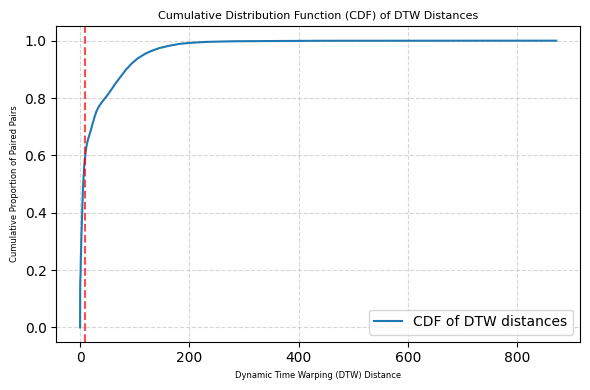

In [60]:
sorted_other = np.sort(dtw_df['DTW_Distance'].values)
cdf_other = np.arange(1, len(sorted_other) + 1) / len(sorted_other)

plt.figure(figsize=(6, 4))
plt.plot(sorted_other, cdf_other, label='CDF of DTW distances')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Add vertical lines at key percentiles (e.g., 60% quantile)
quantile_60 = np.percentile(sorted_other, 60)
plt.axvline(quantile_60, color='red', linestyle='--', alpha=0.7)

# Axis labels and title
plt.title("Cumulative Distribution Function (CDF) of DTW Distances", fontsize=8)
plt.xlabel("Dynamic Time Warping (DTW) Distance", fontsize=6)
plt.ylabel("Cumulative Proportion of Paired Pairs", fontsize=6)

plt.legend()
plt.tight_layout()
plt.savefig("dtw_final.pdf", bbox_inches='tight', dpi=300)
#plt.savefig("dtw.png", bbox_inches='tight', dpi=300)

plt.show()